<center><h1>Patel_Datt_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [20]:
'''
Name: Datt Patel
USC ID: 2149812400
USC Email: dattpate@usc.edu
Github ID: dattpatel99
'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import arff
from sklearn.metrics import ConfusionMatrixDisplay


Get the Vertebral Column Data Set

In [21]:
file_data = arff.load(open('../data/vertebral_column_data/column_2C_weka.arff'))
features = [x[0] for x in file_data['attributes']] # Extracting on the feature names
df = pd.DataFrame(data = file_data['data'], columns = features) # Creating the dataframe
df['class'] = df['class'].map({'Normal':0,'Abnormal':1}) # altering values of class to 1 and 0 and adding a new column for it

### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

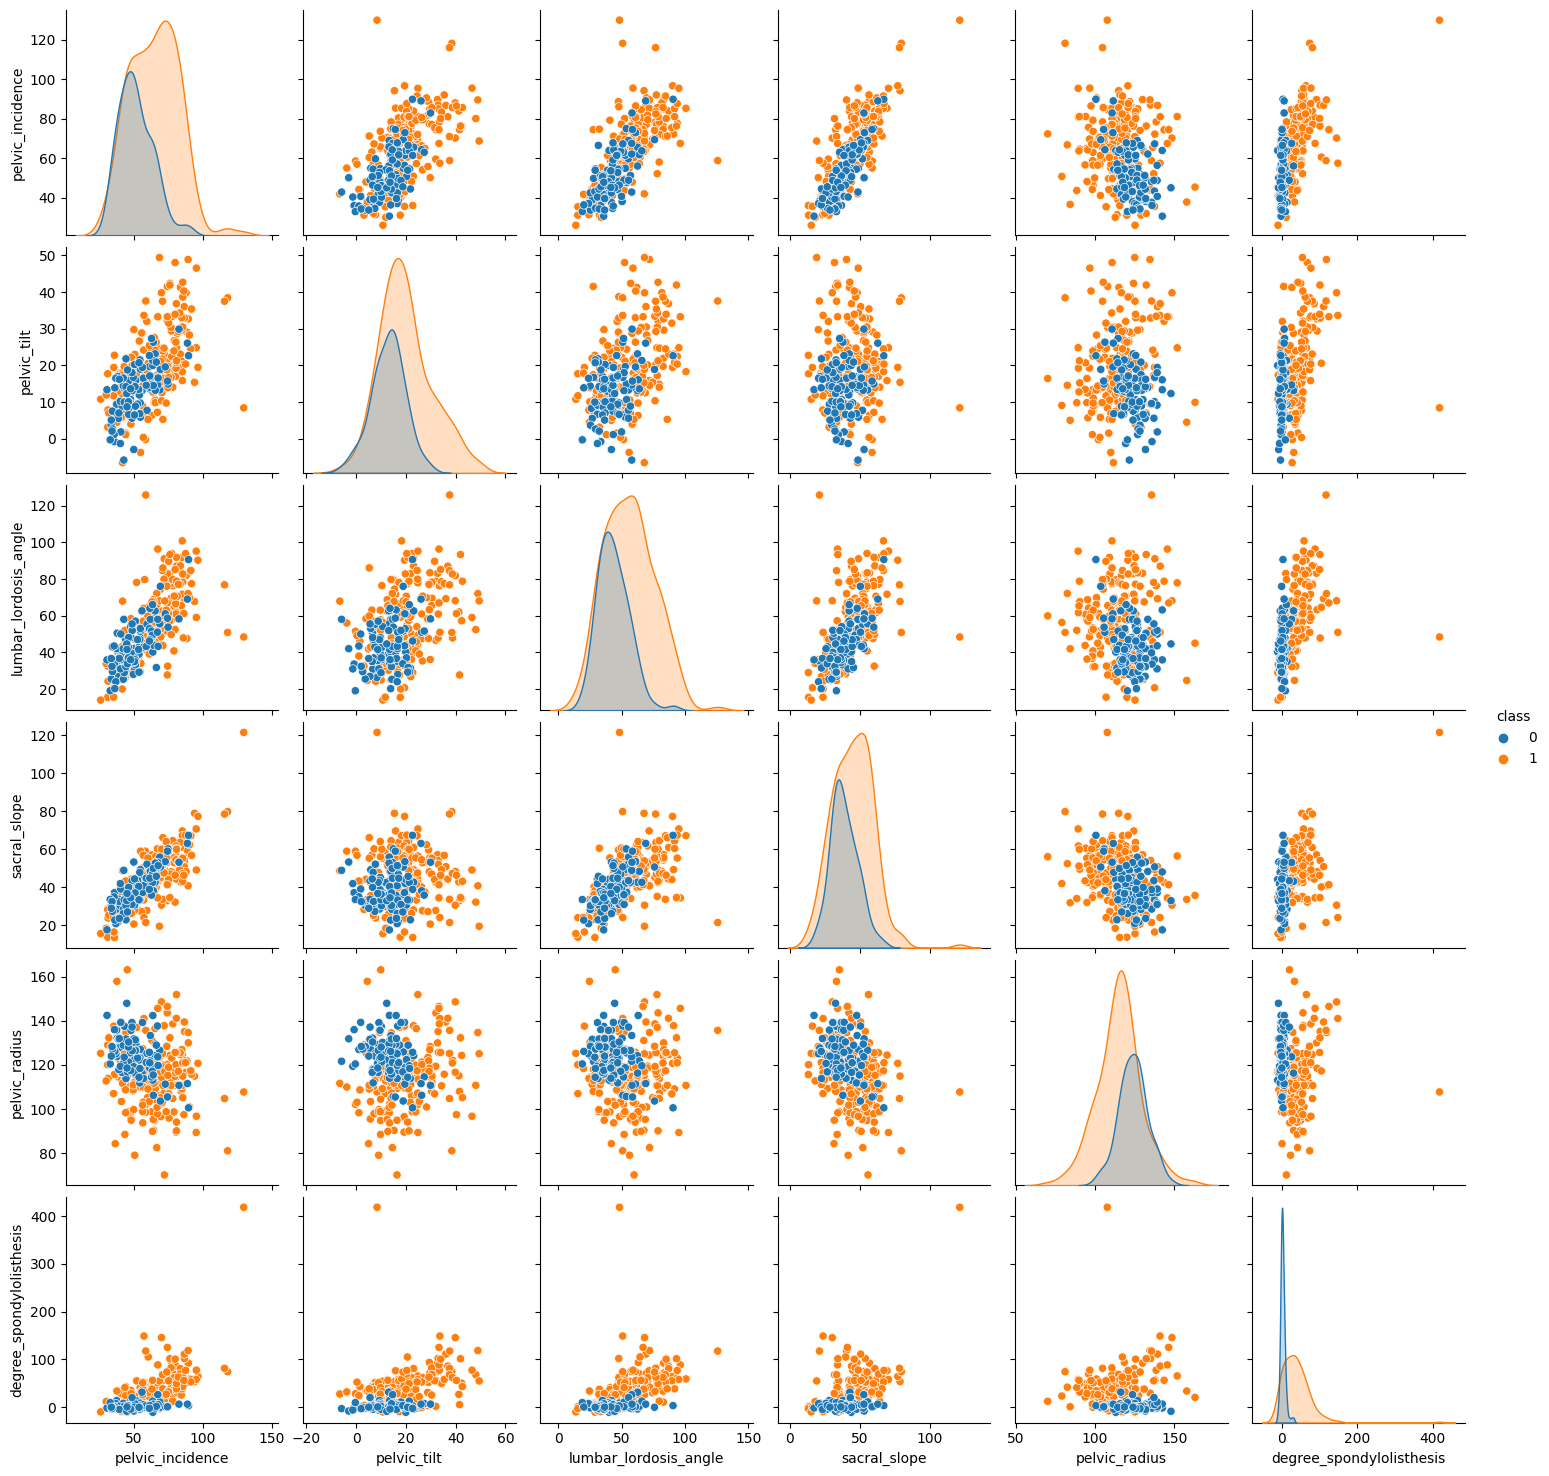

In [22]:
sns.pairplot(df, hue='class')

#### ii. Boxplots

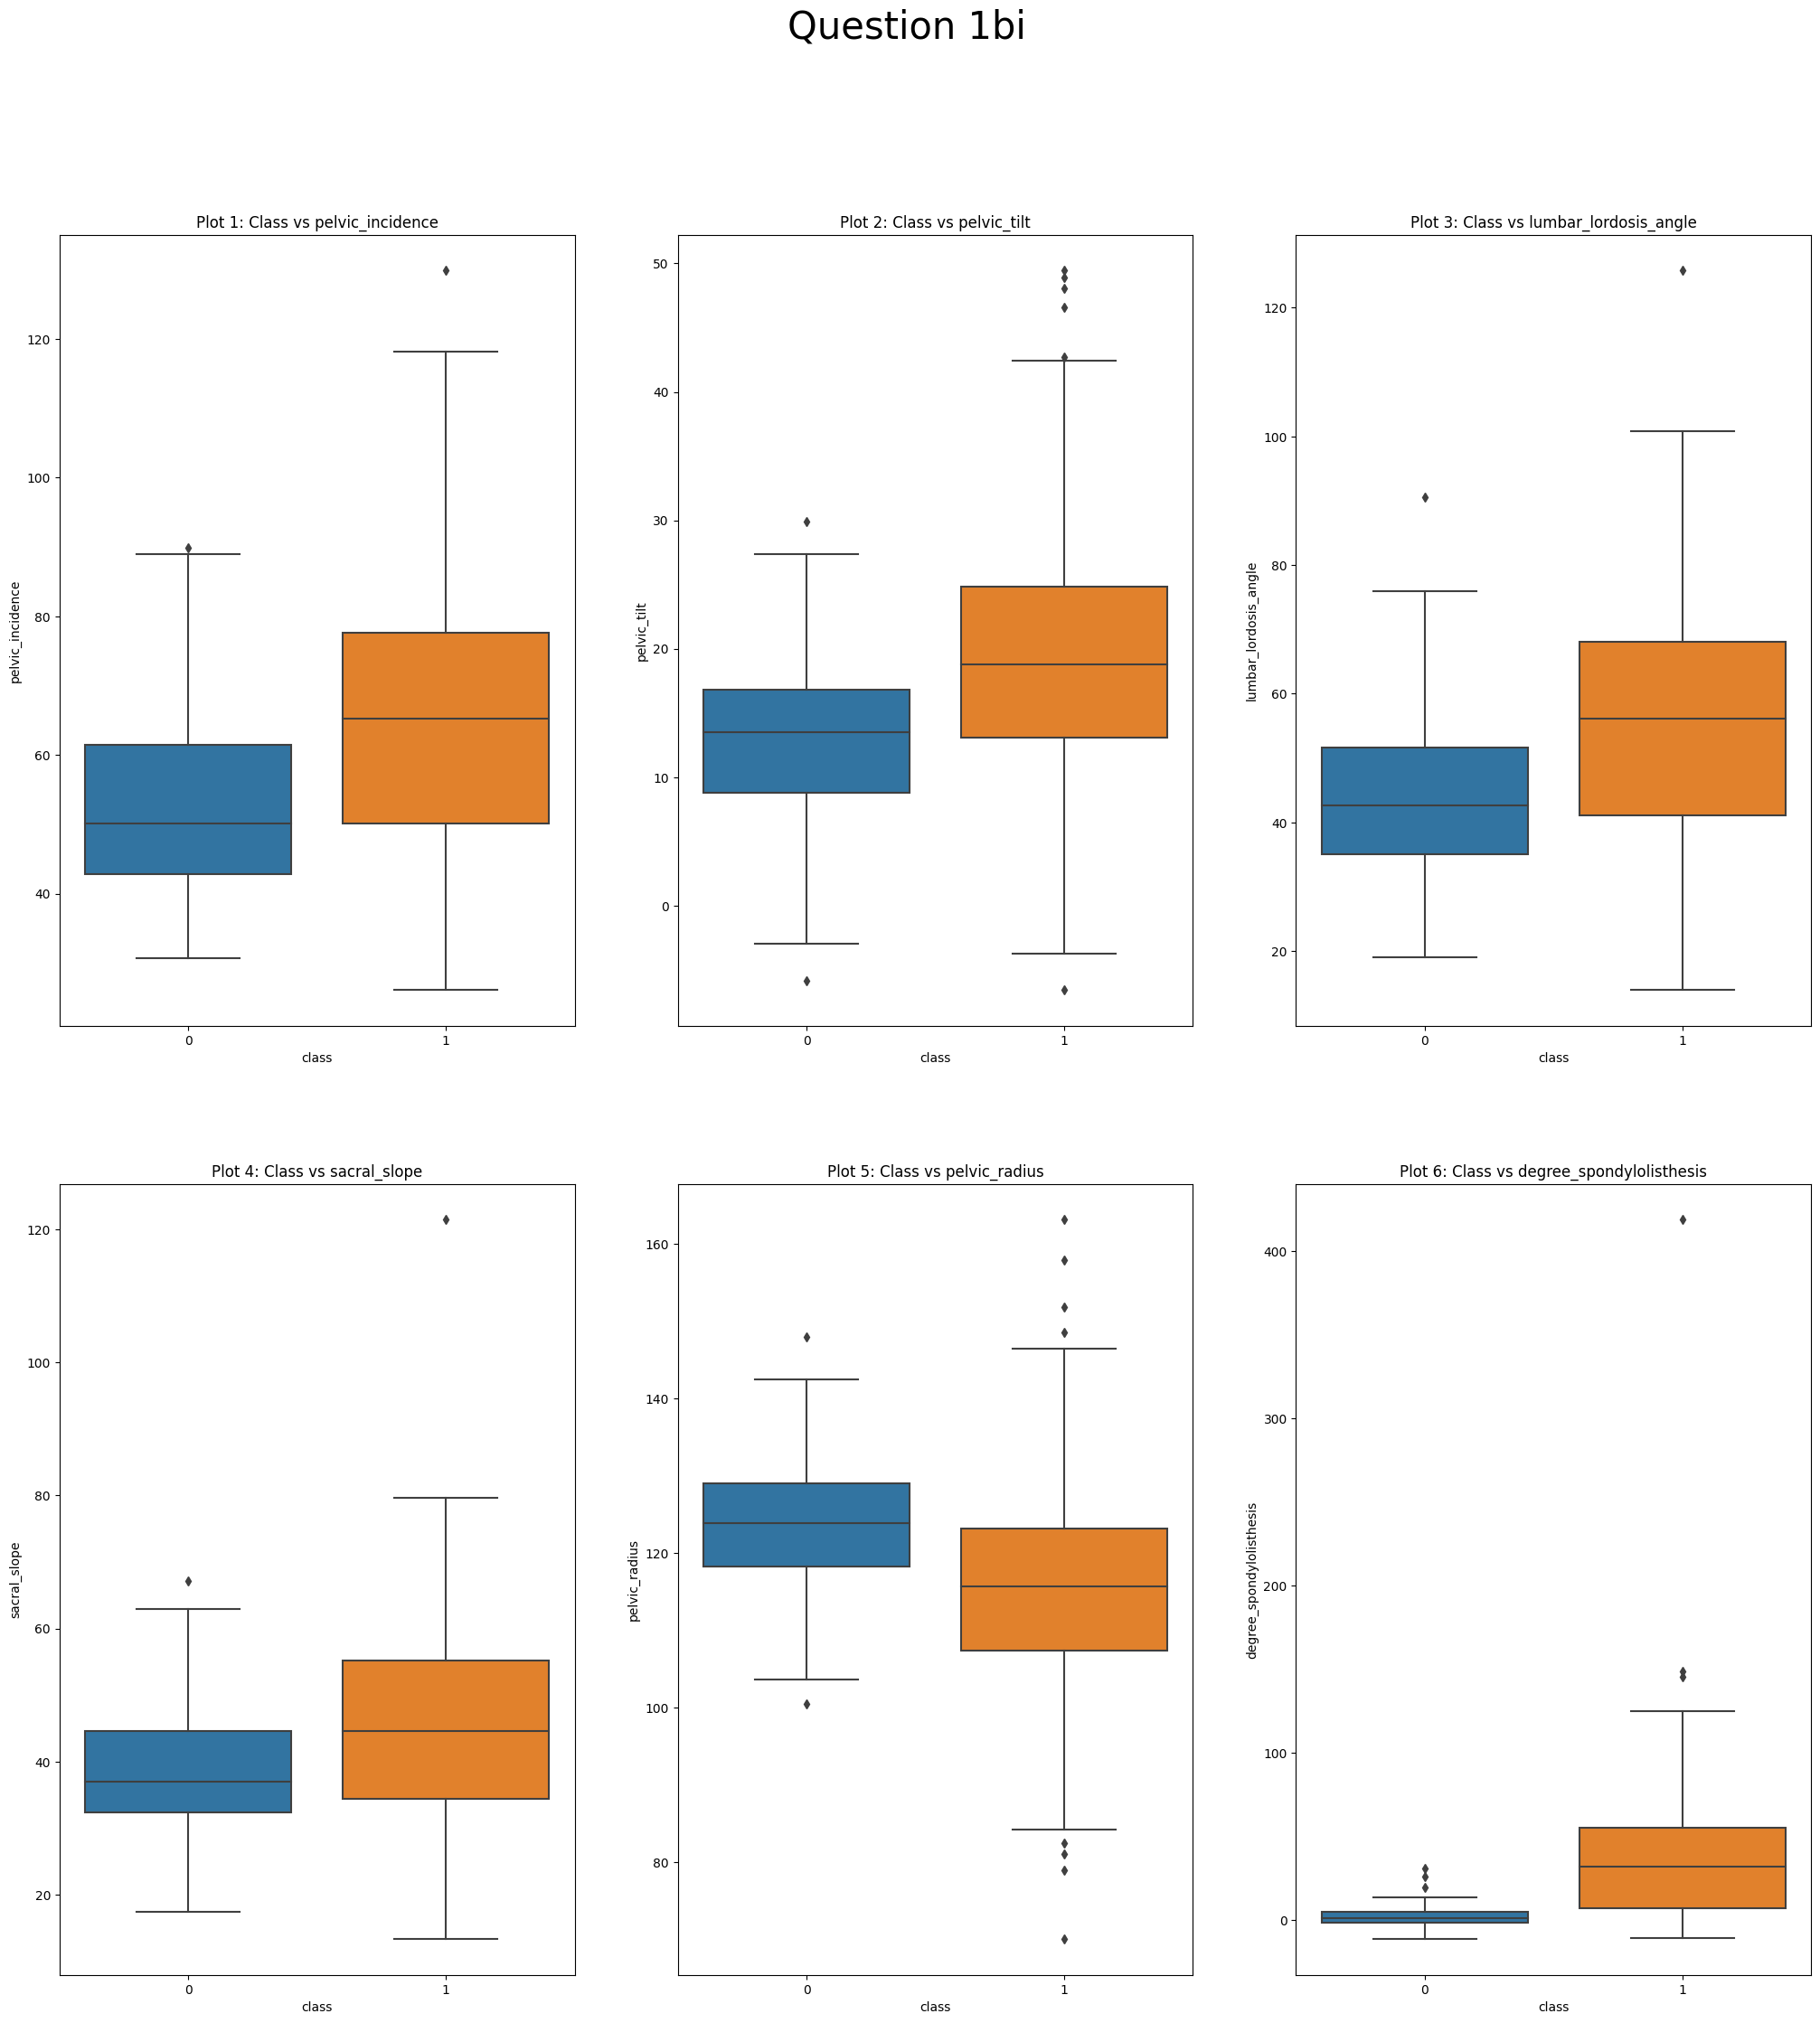

In [23]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(25,25))

# Title for the entire plot
fig.suptitle("Question 1bi",fontsize=30)

for i in range(0, 6):
    sns.boxplot(df, x='class',y=features[i], ax= axs[i//3, i % 3])
    axs[i//3, i % 3].set_title("Plot {}: Class vs {}".format(i+1, features[i]))

#### iii. Split Data Set

In [24]:
# Filtering data as per classification value
data_nor, data_ab = df[df['class'] == 0], df[df['class'] == 1]
print("Total Length: {}, Normal Data: {}, Abnormal Data: {}".format(df.shape,len(data_nor), len(data_ab)))
# Splitting the data
train_d = pd.concat([data_nor[0:70],data_ab[0:140]],axis=0)
test_d = df[~df.index.isin(train_d.index.values)]
print("Training data shape: {}, Testing data shape: {}".format(train_d.shape, test_d.shape))
print("\nTraining Data\n")
train_d.head()

Total Length: (310, 7), Normal Data: 100, Abnormal Data: 210
Training data shape: (210, 7), Testing data shape: (100, 7)

Training Data



,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0


### (c) Classification

#### i. Euclidean Metric And Testing Data (Test Error Plot)

Function for getting the index of maximum 'K' with minimum test_error

Creating the X,Y Train and Test Datas

In [25]:
# Get the required train and test data
train_X, train_y = train_d[features[:6]],train_d['class'].to_numpy()
test_X, test_y = test_d[features[:6]],test_d['class'].to_numpy()

In [26]:
def different_k_models(k_values, train_x, train_y, test_x, test_y, p_value=None,**kwargs):
    k_data = {}
    for n in k_values:
        # Fit the model
        if('metric' in list(kwargs.keys())):
            model = KNeighborsClassifier(n_neighbors = n, p=p_value, metric = kwargs['metric'], metric_params = kwargs['metric_params'])
        elif('weights' in list(kwargs.keys())):
            model = KNeighborsClassifier(n_neighbors = n, p=p_value, weights = kwargs['weights'])
        else:
            model = KNeighborsClassifier(n_neighbors = n, p=p_value)
        model.fit(train_x, train_y)

        # Get the predictions
        pred_train = np.array(model.predict(train_x))
        pred_test = np.array(model.predict(test_x))

        # Cal accuracy
        train_acc = accuracy_score(y_pred=pred_train, y_true=train_y)
        test_acc = accuracy_score(y_pred=pred_test, y_true=test_y)
        k_data[n]= [1-test_acc,1-train_acc,pred_test,pred_train,test_acc, train_acc]
    k_df = pd.DataFrame(k_data).T
    k_df.columns = ['test_error', 'train_error', 'test_prediction', 'train_prediction', 'test_accuracy', 'train_ccuracy']
    return k_df

Creating Model using KNN and finding the best value of 'k' based on Misclassification


Minimum Train Error: 0.0
Minimum Test Error: 0.06000000000000005
Best Test 'K' values: [4]
Value of K* (Based on accuracy): 4



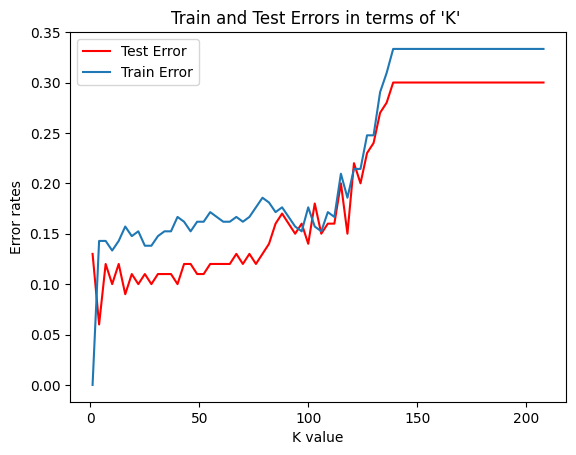

In [27]:
# Create the list of required 'k' values
k_list = [i for i in range(208, 0, -3)]
k_data = different_k_models(k_list, train_X,train_y,test_X,test_y, p_value=2)

# Find indices of best 'k' value in test and train data
euc_min_test = k_data['test_error'].min()
euc_min_train = k_data['train_error'].min()
k_indices = np.where(k_data['test_error'] == euc_min_test)[0]
lowest_errors_k = k_data.iloc[k_indices] # Get K value indices with lowest errors
k_star = lowest_errors_k.iloc[np.where(lowest_errors_k['test_accuracy'] == lowest_errors_k['test_accuracy'].max())[0][-1]] # Get largest K value with maximum accuracy

train_k_indices = np.where(k_data['train_error'] == euc_min_train)[0]

print('''
Minimum Train Error: {}
Minimum Test Error: {}
Best Test 'K' values: {}
Value of K* (Based on accuracy): {}
'''.format(euc_min_train, euc_min_test, list(lowest_errors_k.index), k_star.name))

plt.plot(k_list, k_data['test_error'], color='red', label='Test Error')
plt.plot(k_list, k_data['train_error'], label='Train Error')
plt.legend(loc='best')
plt.title("Train and Test Errors in terms of 'K' ")
plt.xlabel('K value')
plt.ylabel('Error rates')
plt.show()

#### ii. Confusion Matrix

Confusion Matrix: 
[[25  5]
 [ 1 69]]

True Negative: 25
False Positive: 5
False Negative: 1
True Positive: 69

True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
Recall: 0.9857142857142858
F-1 Score: 0.9583333333333333


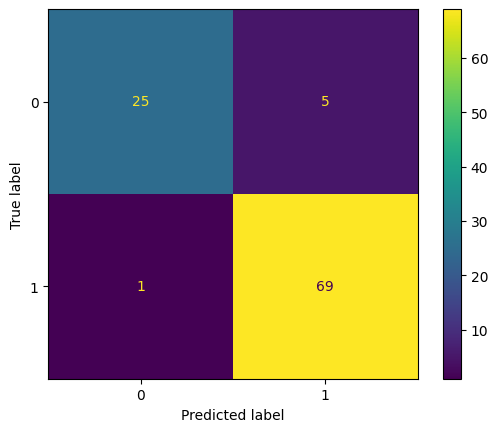

In [28]:
conf_matrix = confusion_matrix(y_pred=k_star['test_prediction'], y_true=test_y)
print("Confusion Matrix: \n{}".format(conf_matrix))

TN, FP, FN, TP = conf_matrix.ravel()
print('''
True Negative: {}
False Positive: {}
False Negative: {}
True Positive: {}
'''.format(TN, FP, FN,TP))

# Sensitivity, hit rate, recall, or true positive rate
true_positive_rate = TP/(TP+FN)
# Specificity or true negative rate
true_negative_rate = TN/(TN+FP) 
# Precision
precision = TP/(TP + FP)
# Recall
recall = TP/(TP + FN)
# F-1 Score
F_score = (2*recall*precision)/(precision+recall)

print('''True Positive Rate: {}
True Negative Rate: {}
Precision: {}
Recall: {}
F-1 Score: {}'''.format(true_positive_rate,true_negative_rate, precision, recall, F_score))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

#### iii. Learning Curve

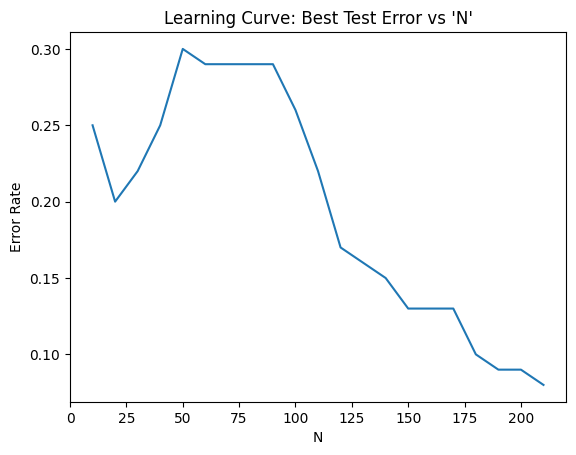

Lowest Error: 0.07999999999999996, Values of 'N' with lowest errors: [210]


In [29]:
# Creates the datasets for each value of N
def createDatasets(N_values):
    data_nor, data_ab = train_d[train_d['class'] == 0],train_d[train_d['class'] == 1]
    datasets = []
    for each in N_values:
        nor_rows, ab_rows = each//3, (each- (each//3))
        datasets.append(pd.concat([data_nor[:nor_rows], data_ab[:ab_rows]], axis=0))
    return datasets

def getKNN(data, N_values):
    # minimum test error based on 'k' with highest accuracy and N
    result = {}
    # Loop for values of neighbours
    for i,n in enumerate(N_values):
        k_data = different_k_models([k for k in range(1, n, 5)], data[i][features[:6]], data[i]['class'].to_numpy(), test_X, test_y, 2)
        euc_min_test = k_data['test_error'].min()
        k_indices = np.where(k_data['test_error'] == euc_min_test)[0]
        lowest_errors_k = k_data.iloc[k_indices]
        k_star = lowest_errors_k.iloc[np.where(lowest_errors_k['test_accuracy'] == lowest_errors_k['test_accuracy'].max())[0][-1]]
        result[n] = k_star
    return result
        
N_values = [i for i in range(10, 211,10)]
data = createDatasets(N_values)
best_errors = getKNN(data, N_values)
test_errors = [i.test_error for i in list(best_errors.values())]

plt.plot(list(best_errors.keys()),test_errors)
plt.title("Learning Curve: Best Test Error vs 'N'")
plt.xlabel('N')
plt.ylabel('Error Rate')
plt.show()

best_N = [list(best_errors.keys())[i] for i in np.where(test_errors == min(test_errors))[0]]
# Output 
print("Lowest Error: {}, Values of 'N' with lowest errors: {}".format(min(test_errors), best_N))

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

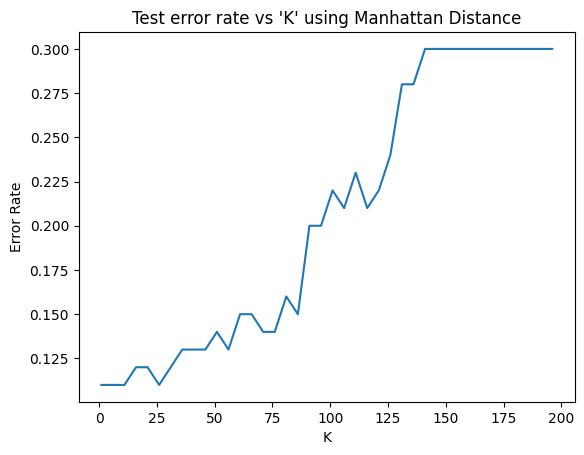

In [30]:
k_list = [i for i in range(1, 200, 5)]
k_data_manhattan = different_k_models(k_list, train_X, train_y, test_X, test_y, 1)

plt.plot(k_list,k_data_manhattan['test_error'])
plt.title("Test error rate vs 'K' using Manhattan Distance")
plt.xlabel('K')
plt.ylabel("Error Rate")
plt.show()

**Finding the Minimum Test Error Rate, Best K values and K Star**

In [31]:
min_test_manhattan = min(k_data_manhattan['test_error'])
best_k_values = k_data_manhattan.iloc[np.where(k_data_manhattan['test_error'] == min_test_manhattan)[0]]
k_star_manhattan = best_k_values.iloc[np.where(best_k_values['test_accuracy']==best_k_values['test_accuracy'].max())[0][-1]]
print("The best K value for Manhattan Distance: {}".format(k_star_manhattan.name))
print()
print("The Best possible values of 'K'")
best_k_values[['test_error', 'test_accuracy']]

The best K value for Manhattan Distance: 26

The Best possible values of 'K'


,test_error,test_accuracy
1,0.11,0.89
6,0.11,0.89
11,0.11,0.89
26,0.11,0.89


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

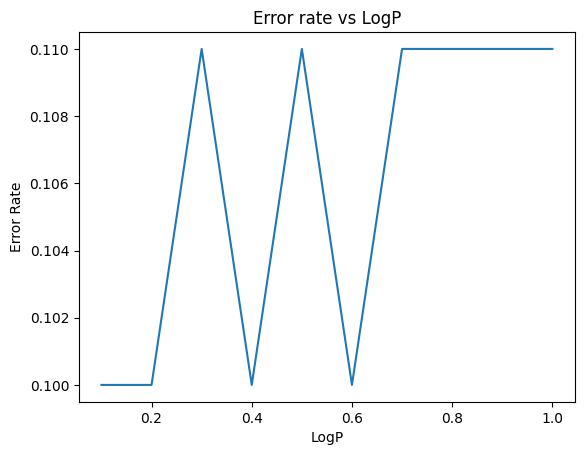

In [32]:
# Create the list of various log values
logP = np.arange(0.1,1.1,0.1)
data = []
for p in logP:
    k_data = different_k_models([k_star_manhattan.name], train_X, train_y, test_X, test_y, pow(10,p))
    k_data['LogP'] = p
    k_data['P'] = pow(10,p)
    data.append(k_data)
k_data_logp = pd.concat(data)
        
plt.plot(k_data_logp['LogP'], k_data_logp['test_error'])
plt.title("Error rate vs LogP")
plt.xlabel('LogP')
plt.ylabel('Error Rate')
plt.show()
# print("Best value of 'K': {}, Best value of Log base 10 of P: {} and best test error rate: {}".format(best_key, best_results[best_key][2], best_results[best_key][1]))

**Finding Best LogP/P and Minimum Test Error**

In [33]:
best_p_indices = np.where(k_data_logp['test_error'] == k_data_logp['test_error'].min())[0]
best_logps = k_data_logp.iloc[best_p_indices]
logp_best = best_logps.iloc[np.where(best_logps['test_accuracy'] == best_logps['test_accuracy'].max())[0][-1]] # Largest P with best accuracy and lowest test error
print('The best value for LogP: {}, where P is {}, and the minimum test error is {}'.format(logp_best['LogP'], logp_best['P'], k_data_logp['test_error'].min()))
print()
print("All possible LogP values")
k_data_logp[['LogP', 'P', 'test_error', 'test_accuracy']]

The best value for LogP: 0.6, where P is 3.9810717055349722, and the minimum test error is 0.09999999999999998

All possible LogP values


,LogP,P,test_error,test_accuracy
26,0.1,1.258925,0.1,0.9
26,0.2,1.584893,0.1,0.9
26,0.3,1.995262,0.11,0.89
26,0.4,2.511886,0.1,0.9
26,0.5,3.162278,0.11,0.89
26,0.6,3.981072,0.1,0.9
26,0.7,5.011872,0.11,0.89
26,0.8,6.309573,0.11,0.89
26,0.9,7.943282,0.11,0.89
26,1.0,10.000000,0.11,0.89


##### C. Chebyshev Distance With p -> infinity.

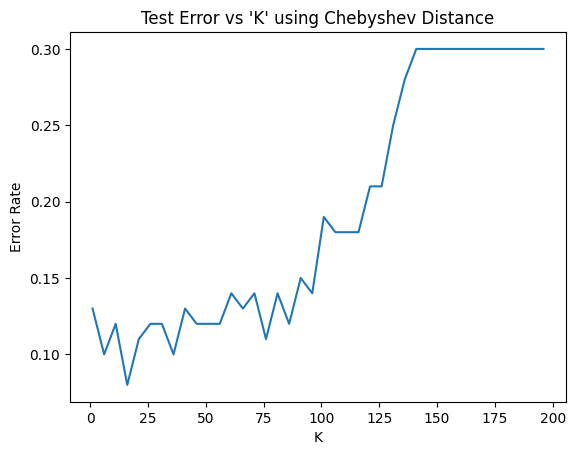

In [34]:

k_list = [i for i in range(1, 200, 5)]
k_data_cheb = different_k_models(k_list, train_X, train_y, test_X, test_y, float('inf'))

plt.plot(k_list,k_data_cheb['test_error'])
plt.title("Test Error vs 'K' using Chebyshev Distance")
plt.xlabel('K')
plt.ylabel("Error Rate")
plt.show()

**Finding the Minimum Test Error Rate, Best K values and K Star Chebyshev**

In [35]:
min_test_cheb = min(k_data_cheb['test_error'])
best_k_values = k_data_cheb.iloc[np.where(k_data_cheb['test_error'] == min_test_cheb)[0]]
k_star_cheb = best_k_values.iloc[np.where(best_k_values['test_accuracy']==best_k_values['test_accuracy'].max())[0][-1]]
print("The best K value for Chebyshev Distance: {}".format(k_star_cheb.name))
print()
print("The Best possible values of 'K'")
best_k_values[['test_error', 'test_accuracy']]

The best K value for Chebyshev Distance: 16

The Best possible values of 'K'


,test_error,test_accuracy
16,0.08,0.92


#### ii. Mahalanobis Distance.

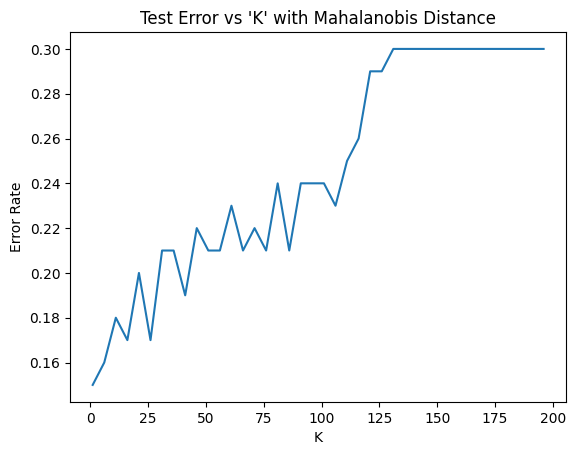

In [36]:
k_set = [i for i in range(1,200,5)]
# Take pesudoinverse of the covariance
k_data_mahalanobis = different_k_models(k_set, train_X, train_y, test_X, test_y, p_value=None, metric='mahalanobis',metric_params={'VI': (np.linalg.pinv(np.cov(train_X, rowvar=False)))})

plt.plot(k_set, k_data_mahalanobis['test_error'])
plt.title("Test Error vs 'K' with Mahalanobis Distance")
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

**Finding the Minimum Test Error Rate, Best K values and K Star Mahalanobis**

In [37]:
min_test_maha = min(k_data_mahalanobis['test_error'])
best_k_values = k_data_mahalanobis.iloc[np.where(k_data_mahalanobis['test_error'] == min_test_maha)[0]]
k_star_maha = best_k_values.iloc[np.where(best_k_values['test_accuracy']==best_k_values['test_accuracy'].max())[0][-1]]
print("The best K value for Mahalanobis Distance: {}".format(k_star_maha.name))
print()
print("The Best possible values of 'K'")
best_k_values[['test_error', 'test_accuracy']]

The best K value for Mahalanobis Distance: 1

The Best possible values of 'K'


,test_error,test_accuracy
1,0.15,0.85


### (e) Weighted Decision

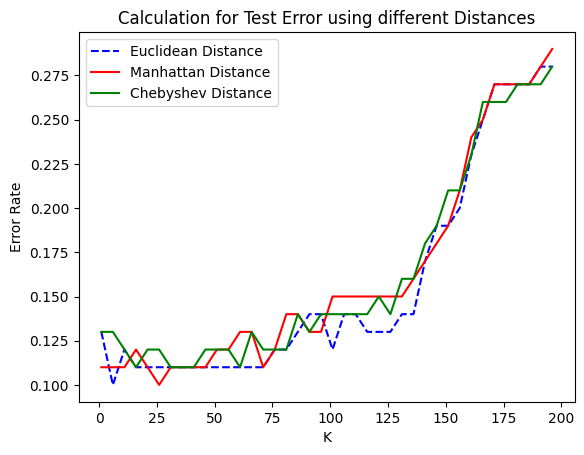


The best test errors for each:
Euclidean: 0.09999999999999998
Manhattan: 0.09999999999999998
Chebyshev: 0.10999999999999999


In [38]:
k_set = [i for i in range(1,200,5)]

k_data_e = different_k_models(k_set, train_X, train_y, test_X, test_y, p_value= 2, weights='distance')
k_data_m = different_k_models(k_set, train_X, train_y, test_X, test_y, p_value= 1, weights='distance')
k_data_c = different_k_models(k_set, train_X, train_y, test_X, test_y, p_value= float('inf'), weights='distance')

plt.title("Calculation for Test Error using different Distances")
plt.plot(k_set,k_data_e['test_error'],color='blue', linestyle='dashed', label='Euclidean Distance')
plt.plot(k_set,k_data_m['test_error'],color='red', label='Manhattan Distance')
plt.plot(k_set,k_data_c['test_error'],color='green', label='Chebyshev Distance')
plt.legend(loc='best')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print()
print("The best test errors for each:\nEuclidean: {}\nManhattan: {}\nChebyshev: {}".format(min(k_data_e['test_error']),min(k_data_m['test_error']),min(k_data_c['test_error'])))

### (f) Training Error Rate

Minimum Training Error Rate is 0.0% when K = 1.

**Rferences**

-> https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html

-> https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826#:~:text=Misclassification%20Rate%3A%20It%20tells%20you,or%20(1%2DAccuracy).

-> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

-> https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html